In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from collections import Counter
data1 = pd.read_csv('credit_risk_data_balanced.csv')
data = data1.iloc[:,1:11]
def Normalization (cluster):
    cluster_dim = cluster.shape
    cluster_mean = np.mean(cluster,0)
    cluster_mean_mat = np.matlib.repmat(cluster_mean,cluster_dim[0],1)
    cluster1 = (cluster-cluster_mean_mat)/np.std(cluster) - cluster_mean_mat
    return cluster1
data = Normalization(data)
#split the train data and the test data
label = data1.iloc[:,0]
label = label.astype('category')
training_data,test_data,training_label,test_label= train_test_split(data,label,test_size = 0.2,random_state = 42)

In [2]:
#Performance of KNN
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors = 1)
#fit training_data into KNN
kNN.fit(training_data,training_label)
predicted_label = kNN.predict(test_data)

In [9]:
test_label = np.array(test_label)

In [10]:
# six classification measures
import numpy as np 
import math

def compute_measure(predicted_label,true_label):
    t_idx = (predicted_label == true_label)# truely predicted
    f_idx = np.logical_not(t_idx)# falsely predicted
    
    p_idx = (true_label > 0) #positive targets
    n_idx = np.logical_not(p_idx)#negative targets
    tp = np.sum(np.logical_and(t_idx,p_idx))# TP
    tn = np.sum(np.logical_and(t_idx,n_idx))# TN
    # false positive:original negative but classified as postive
    #false negative:original positive but classified as negative
    fp = np.sum(n_idx)-tn
    fn = np.sum(p_idx)-tp
    tp_fp_tn_list = []
    tp_fp_tn_list.append(tp)
    tp_fp_tn_list.append(fp)
    tp_fp_tn_list.append(tn)
    tp_fp_tn_list.append(fn)
    tp_fp_tn_list = np.array(tp_fp_tn_list)
    tp = tp_fp_tn_list[0]
    fp = tp_fp_tn_list[1]
    tn = tp_fp_tn_list[2]
    fn = tp_fp_tn_list[3]
    
    with np.errstate(divide = 'ignore'):
        sen = (1.0*tp)/(tp+fn)
    with np.errstate(divide = 'ignore'):
        spc = (1.0*tn)/(tn+fp)
    with np.errstate(divide = 'ignore'):
        ppr = (1.0*tp)/(tp+fp)
    with np.errstate(divide = 'ignore'):
        npr = (1.0*tn)/(tn+fn)
    
        F1_score = float(2*tp)/(2*tp+fp+fn)
        acc = (tp+tn)*1.0/(tp+fp+tn+fn)
        mcc = (tp*tn-fp*fn)/math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
        
        ans=[]
        ans.append(acc)
        ans.append(sen)
        ans.append(spc)
        ans.append(ppr)
        ans.append(npr)
        ans.append(mcc)
        ans.append(F1_score)
    return ans

In [11]:
ans = compute_measure(predicted_label,test_label)
print('This is the accuracy of kernel KNN model:  '+ str(ans[0]))
print('This is the sensitivy of kernel KNN model:  '+ str(ans[1]))
print('This is the specificity of kernel KNN model: '+ str(ans[2]))
print('This is the positive predictive ratios of kernel KNN model: '+ str(ans[3]))
print('This is the negative predictive ratios of kernel KNN model: '+ str(ans[4]))
print('This is the mcc of kernel KNN model: '+ str(ans[5]))
print('This is the F1 scores of the kernel KNN model: '+ str(ans[6]))

This is the accuracy of kernel KNN model:  0.604546814239
This is the sensitivy of kernel KNN model:  0.546052631579
This is the specificity of kernel KNN model: 0.663076002394
This is the positive predictive ratios of kernel KNN model: 0.618563685637
This is the negative predictive ratios of kernel KNN model: 0.593465452598
This is the mcc of kernel KNN model: 0.210573892117
This is the F1 scores of the kernel KNN model: 0.580050825921


In [12]:
from sklearn.metrics import classification_report
y_true = test_label.tolist()
y_pred = predicted_label.tolist()
target_names = ['Good credit', 'Bad credit']
print(classification_report(y_true, y_pred, target_names = target_names))

             precision    recall  f1-score   support

Good credit       0.59      0.66      0.63      1671
 Bad credit       0.62      0.55      0.58      1672

avg / total       0.61      0.60      0.60      3343



In [10]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(test_label, predicted_label)
roc_auc = metrics.auc(fpr, tpr)

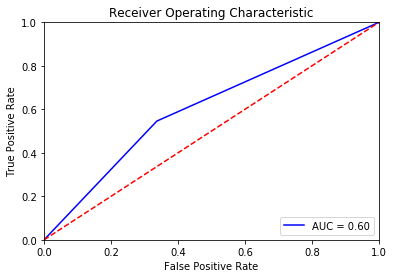

In [13]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()